<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/4_2_portfolio_investment_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.　国際証券投資のデータサイエンス：IFSデータを用いた分析

　本例は、国際通貨基金（IMF）が発行するInternational Financial Statistics: IFSのバルクデータを用い、国際証券投資の分析を行います。1945年設立のIMFは、1920年から現在までのマクロ経済データを各国から収集し、刊行しています。国際証券投資データは1980年代以降整備され、加盟190カ国（2023年9月時点）のデータがバルクデータとしてHPから公表されています。本例では、データの取得・整理・記述統計・可視化、を説明します。

　尚、本ソースコードは分析対象が米国以外の国・地域です。米国を分析対象とする場合は、「第3回国際証券投資IFS_United_States」を使用してください。


In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

　次にIMFのバルクデータを読み込みます。このバルクデータは、190カ国×1920-2022年の年次データです。将来、国際証券投資以外のIFSのデータコード、国番号を使用する際は、[2]で読み込まれたデータを確認してください。

In [ ]:
#[2]データの読み込み(URLから)
URL = "https://drive.google.com/uc?id=17a4Hmefw8ne96sTNriblinn6vh6v-6ky"
r = requests.get(URL)
ifs = pd.read_csv(io.BytesIO(r.content),index_col=0)
ifs

　上記で取得したデータから「米国」のデータを抽出し、整形します。尚、早稲田ビジネススクール「国際金融論」、横浜市立大学「国際金融論II」で使用する国・地域コードは次の通りです。

米国 111　日本158　中国624　香港532　韓国542　シンガポール576　マレーシア548　インド534　豪州193　NZ196　ロシア922　ウクライナ926　南アフリカ199　ブラジル223　アルゼンチン213　英国112　スイス146　スウェーデン146　デンマーク128

In [ ]:
#[3]国・地域データの抽出
country=pd.DataFrame(ifs[(ifs["Country Code"] == 158)]) #国・地域コードの入力箇所
country.reset_index(inplace=True) #インデックスのリセット
country.drop(country.columns[[0,1,2]],axis=1, inplace=True) #列の削除
country=country.T #行列の転置
country.columns = country.iloc[0] #新変数名（列）の定義
country = country.drop(country.index[0]) #行の削除
country.head() #データ確認

　本編は「国際金融論」における「国際証券投資の分析」がテーマです。IMF加盟190カ国の国際収支は次の項目から構成されます。

※国際収支の構成

(A) 経常収支　貿易サービス収支・第一次所得収支・第二次所得収支他

(B) 金融収支　外国直接投資・国際証券投資・その他投資・外貨準備


　国際収支表は(A)=(B)となるべく作成されています。そして「国際証券投資」は対外証券投資・対内証券投資のOutflow・Inflowの差し引きから算出され、さらにそれらは、

(C) 対外証券投資　対外株式投資・対外債券投資

(D) 対内証券投資　対内株式投資・対外株式投資

に分類されます。
そしてこれらの国際証券投資のコードは次の通りです。

対外証券投資（合計）　IAP_BP6_USD
　対外株式投資　IAPE_BP6_USD
　対外債券投資　IAPD_BP6_USD

対内証券投資（合計）ILP_BP6_USD
　対内株式投資　ILPE_BP6_USD
　対内債券投資　ILPD_BP6_USD

In [ ]:
#[4]国際証券投資データの抽出と前処理
country2=country[['ILP_BP6_USD','ILPE_BP6_USD','ILPD_BP6_USD','NGDP_XDC','ENDA_XDC_USD_RATE']]
country2.columns=['ILP_BP6_USD1','ILP_BP6_USD2','ILPE_BP6_USD1','ILPE_BP6_USD2','ILPD_BP6_USD1','ILPD_BP6_USD2','NGDP_XDC','ENDA_XDC_USD_RATE1','ENDA_XDC_USD_RATE2']
country3=country2.drop(columns=country2.columns[1]) #一列ずつ不要な列を削除
country4=country3.drop(columns=country3.columns[2]) #一列ずつ不要な列を削除
country5=country4.drop(columns=country4.columns[3]) #一列ずつ不要な列を削除
country6=country5.drop(columns=country4.columns[6]) #一列ずつ不要な列を削除
country7=country6.dropna() #欠損値を含む行の削除
country8=country7.drop('Attribute') #不要な行の削除
country8 #データ確認

尚、上記のデータは基準化のため、各国名目GDPをUSドル換算した値で除しています。これらの名目GDP、対US㌦レート（期中平均値）のコードは次の通りです。

　名目国内総生産（GDP）　NGDP_XDC
　対US㌦レート（期中平均値）　ENDA_XDC_USD_RATE

当然のことながら、[2]のデータを確認することで、他のマクロ経済データや金利データの取得も可能です。

In [ ]:
#[5]国際証券投資データ対GDP比の算出
country8['ILP_BP6_USD1'] =country8['ILP_BP6_USD1'].astype('float') #数値データへの変換
country8['ILPE_BP6_USD1'] =country8['ILPE_BP6_USD1'].astype('float') #数値データへの変換
country8['ILPD_BP6_USD1'] =country8['ILPD_BP6_USD1'].astype('float') #数値データへの変換
country8['NGDP_XDC'] =country8['NGDP_XDC'].astype('float') #数値データへの変換
country8['ENDA_XDC_USD_RATE'] =country8['ENDA_XDC_USD_RATE1'].astype('float') #数値データへの変換
country8['total']=country8['ILP_BP6_USD1']/((country8['NGDP_XDC'])/(country8['ENDA_XDC_USD_RATE'])) #対GDP比の算出①
country8['equity']=country8['ILPE_BP6_USD1']/((country8['NGDP_XDC'])/(country8['ENDA_XDC_USD_RATE'])) #対GDP比の算出②
country8['bond']=country8['ILPD_BP6_USD1']/((country8['NGDP_XDC'])/(country8['ENDA_XDC_USD_RATE'])) #対GDP比の算出③
country9=country8[['total','equity','bond']] #新データフレームの作成
country9.describe() #記述統計

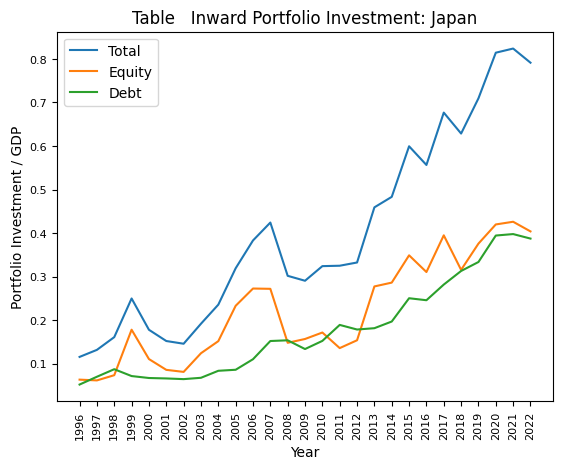

In [7]:
#[6]可視化
plt.xticks(rotation=90) #横軸ラベルを90度回転
plt.xlabel("Year") #横軸タイトル
plt.ylabel("Portfolio Investment / GDP") #縦軸タイトル
plt.tick_params(labelsize=8) #横軸ラベルのサイズ
plt.title('Table   Inward Portfolio Investment: Japan') #図表タイトル
#plt.plot(country9[['total','equity','bond']])
plt.plot(country9['total'], label='Total')
plt.plot(country9['equity'], label='Equity')
plt.plot(country9['bond'], label='Debt')
plt.legend()